# Time-lapse inversion
In this notebook we will see how to use ResIPy API to do a time-lapse inversion (difference).

In [1]:
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import os
import sys
sys.path.append(os.path.relpath('../src')) # add here the relative path of the API folder
testdir = '../src/examples/dc-2d-timelapse/'
from resipy import Project

API path =  /media/jkl/data/phd/resipy/src/resipy
ResIPy version =  3.4.6
cR2.exe found and up to date.
R3t.exe found and up to date.
cR3t.exe found and up to date.


Then we can import all the dataset. Note that they should all be in the same directory and will be sorted according to alphabetical order.

In [2]:
k = Project(typ='R2')
k.createTimeLapseSurvey(testdir + 'data/')

Working directory is: /media/jkl/data/phd/resipy/src/resipy
clearing dirname
3/3 imported


In [3]:
k.surveys # to display the list of the surveys object

The inversion is seamlessly the same. It will automatically take the first survey os background model. Invert it in a specific `ref` directory inside the working directory and then invert the other datasets.

In [4]:
k.invert(parallel=True) # takes a while because it invert all the surveys together

Creating triangular mesh...done (1786 elements)
Writing .in file and protocol.dat... Matching quadrupoles between pairs of (background, surveyX) for difference inversion...done in 0.0044s
done
------------ INVERTING REFERENCE SURVEY ---------------


 >> R  2    R e s i s t i v i t y   I n v e r s i o n   v4.10 <<

 >> D a t e : 03 - 12 - 2023
 >> My beautiful survey                                                             
 >> I n v e r s e   S o l u t i o n   S e l e c t e d <<
 >> Determining storage needed for finite element conductance matrix
 >> Generating index array for finite element conductance matrix
 >> Reading start resistivity from res0.dat                      
 >> R e g u l a r i s e d   T y p e <<
 >>   L i n e a r    F i l t e r    <<
 >> L o g - D a t a   I n v e r s i o n <<
 >> N o r m a l   R e g u l a r i s a t i o n <<
 >> D a t a   w e i g h t s   w i l l   b e  m o d i f i e d <<


 Processing dataset   1


 Measurements read:   190     Measurements rejecte

All ok




 >> R  2    R e s i s t i v i t y   I n v e r s i o n   v4.10 <<

 >> D a t e : 03 - 12 - 2023
 >> My beautiful survey                                                             
 >> I n v e r s e   S o l u t i o n   S e l e c t e d <<


 >> R  2    R e s i s t i v i t y   I n v e r s i o n   v4.10 <<

 >> D a t e : 03 - 12 - 2023
 >> My beautiful survey                                                             
 >> I n v e r s e   S o l u t i o n   S e l e c t e d <<
 >> Determining storage needed for finite element conductance matrix
 >> Determining storage needed for finite element conductance matrix
 >> Generating index array for finite element conductance matrix
 >> Generating index array for finite element conductance matrix
 >> Reading start resistivity from Start_res.dat                 
 >> R e g u l a r i s e d   T y p e <<
 >>   L i n e a r    F i l t e r    <<
 >> T r u e - D a t a   I n v e r s i o n <<
 >> D i f f e r e n c e    R e g u l a r i s a t i o n <<
 >> D a

All ok


     Initial RMS Misfit:         3.33       Number of data ignored:     0
     Alpha:         114.863   RMS Misfit:        1.91  Roughness:       13.030
     Alpha:          53.315   RMS Misfit:        1.36  Roughness:       18.983
     Alpha:          24.747   RMS Misfit:        1.15  Roughness:       25.850
     Alpha:          11.486   RMS Misfit:        1.29  Roughness:       33.615
     Step length set to   1.00000
     Final RMS Misfit:        1.15
     Attempted to update data weights and caused overshoot
     treating as converged

 Solution converged - Outputing results to file

 Calculating sensitivity map


 Processing dataset   2


 End of data:  Terminating
2/2 inversions completed
----------- END OF INVERSION IN // ----------
3/3 results parsed (3 ok; 0 failed)


All ok


Note that we can visualize the different inverted sections using `R2.showResults(index=0, attr='Resistivity(log10)')`.

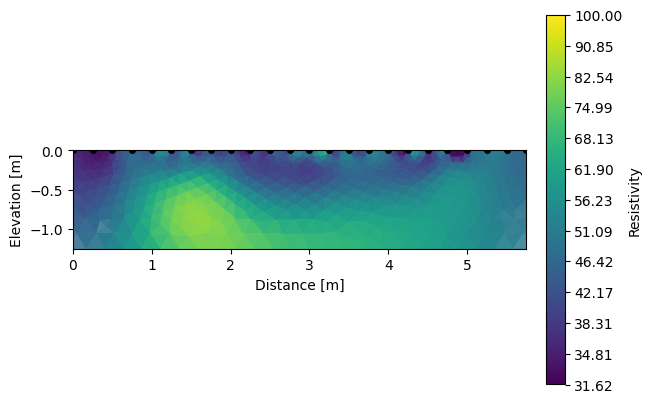

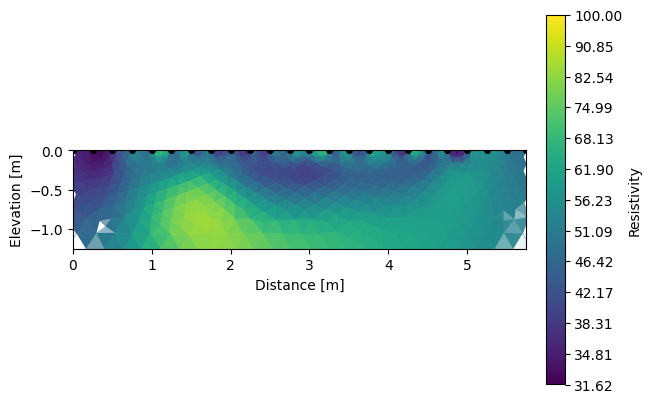

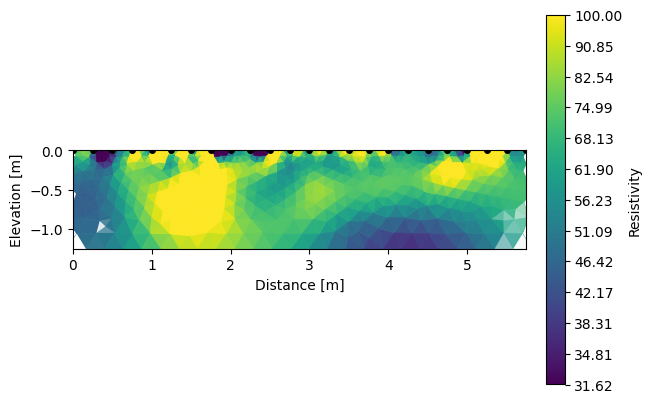

In [5]:
k.showResults(index=0, attr='Resistivity(log10)', contour=False, vmin=1.5, vmax=2)
k.showResults(index=1, attr='Resistivity(log10)', contour=False, vmin=1.5, vmax=2)
k.showResults(index=2, attr='Resistivity(log10)', contour=False, vmin=1.5, vmax=2)

We can also look for the differences between each survey.

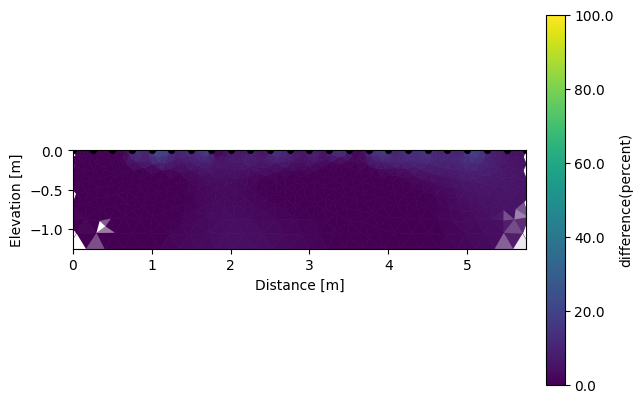

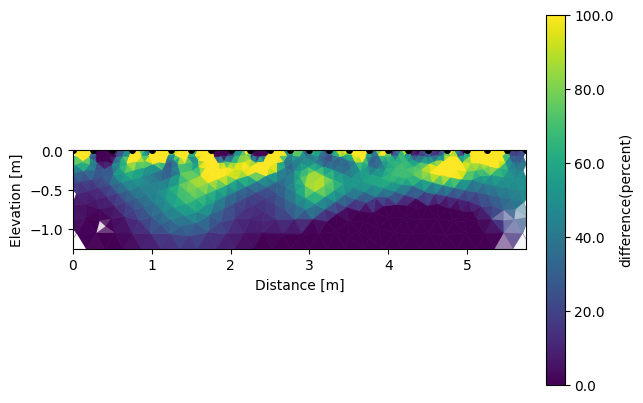

In [6]:
# the differnces are in percent in reference to the backround survey (index=0)
k.showResults(index=1, attr='difference(percent)', contour=False, vmin=0, vmax=100)
k.showResults(index=2, attr='difference(percent)', contour=False, vmin=0, vmax=100)

Like this we can observe a deeper positive change (drying) during the growth season of wheat mainly due to the root water uptake.